In [1]:
import pandas as pd

In [2]:
test_golden = pd.read_csv("test/Test_Processed.csv")
test_golden.head()

,entity1ID,entity2ID,label1,label2,relation,snippet,relation.1
0,497,494,Ford_Motor_Company,Holden,NaN,95s to top the sheets ahead of Kiwi Fabian Cou...,False
1,497,494,Ford_Motor_Company,Holden,NaN,95s to top the sheets ahead of Kiwi Fabian Cou...,False
2,188,244,Apple_Inc.,HBO,NaN,\nGamers who want to access HBO Now on the Xbo...,False
3,188,244,Apple_Inc.,HBO,NaN,\nHBO first launched its standalone subscripti...,False
4,188,244,Apple_Inc.,HBO,NaN,\nHBO first launched its standalone subscripti...,False


In [3]:
test_golden.shape

(20591, 7)

In [56]:
test = test_golden.copy()
test_golden.drop_duplicates(inplace=True, subset=["label1", "label2", "snippet"])
test_golden.shape

(18002, 7)

In [5]:
test_golden.head()

,entity1ID,entity2ID,label1,label2,relation,snippet,relation.1
0,497,494,Ford_Motor_Company,Holden,NaN,95s to top the sheets ahead of Kiwi Fabian Cou...,False
2,188,244,Apple_Inc.,HBO,NaN,\nGamers who want to access HBO Now on the Xbo...,False
3,188,244,Apple_Inc.,HBO,NaN,\nHBO first launched its standalone subscripti...,False
5,456,314,Google,Verizon_Communications,NaN,\nGoogle's business immediately took a hit : p...,False
6,522,178,Twitter,Beats_Electronics,NaN,"His endorsement list ain't bad either, includ...",False


In [6]:
lstm_result = pd.read_csv("onto-test/bi_lstm.csv")
lstm_result.shape

(18002, 5)

In [7]:
from sklearn.metrics import f1_score

In [8]:
lstm_result.head()

,company1,company2,is_parent,snippet,aliased_snippet
0,Ford_Motor_Company,Holden,1.089333e-04,95s to top the sheets ahead of Kiwi Fabian Cou...,95s to top the sheets ahead of kiwi fabian cou...
1,Apple_Inc.,HBO,5.136681e-06,\nGamers who want to access HBO Now on the Xbo...,\ngamers who want to access company2 now on ...
2,Apple_Inc.,HBO,3.838687e-03,\nHBO first launched its standalone subscripti...,\n company2 first launched its standalone sub...
3,Google,Verizon_Communications,3.283885e-06,\nGoogle's business immediately took a hit : p...,\n company1 's business immediately took a hit...
4,Twitter,Beats_Electronics,3.509106e-07,"His endorsement list ain't bad either, includ...","his endorsement list ain't bad either, includ..."


In [9]:
lstm_result["bin"]  = lstm_result["is_parent"] > 0.5
lstm_result.head()

,company1,company2,is_parent,snippet,aliased_snippet,bin
0,Ford_Motor_Company,Holden,1.089333e-04,95s to top the sheets ahead of Kiwi Fabian Cou...,95s to top the sheets ahead of kiwi fabian cou...,False
1,Apple_Inc.,HBO,5.136681e-06,\nGamers who want to access HBO Now on the Xbo...,\ngamers who want to access company2 now on ...,False
2,Apple_Inc.,HBO,3.838687e-03,\nHBO first launched its standalone subscripti...,\n company2 first launched its standalone sub...,False
3,Google,Verizon_Communications,3.283885e-06,\nGoogle's business immediately took a hit : p...,\n company1 's business immediately took a hit...,False
4,Twitter,Beats_Electronics,3.509106e-07,"His endorsement list ain't bad either, includ...","his endorsement list ain't bad either, includ...",False


In [10]:
print(f1_score(test_golden["relation.1"], lstm_result["bin"]))

0.1322604978627106


In [11]:
test_golden["relation.1"].value_counts()

False    17473
True       529
Name: relation.1, dtype: int64

In [12]:
golden_true = test_golden[ test_golden["relation.1"] == True]
golden_true.head()

,entity1ID,entity2ID,label1,label2,relation,snippet,relation.1
26,86,410,UniCredit,HypoVereinsbank,NaN,Commerzbank has around 8 percent of the Germa...,True
42,56,366,Rosneft,Yukos,NaN,"\nIn Russia, ExxonMobil's partner has been the...",True
188,357,503,Ingersoll_Rand,Trane,NaN,"It is engaged in the design, manufacture, sal...",True
189,357,503,Ingersoll_Rand,Trane,NaN,"It is engaged in the design, manufacture, sal...",True
311,285,268,Danaher_Corporation,Pall_Corporation,NaN,Pall_Corporation is being acquired by Danaher...,True


In [13]:
from sklearn.metrics import accuracy_score

In [14]:
accuracy_score(test_golden["relation.1"], lstm_result["bin"])

0.8082990778802356

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          figsize=(9, 7)):
    matrix = confusion_matrix(y_true, y_pred)

    if normalize:
        matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=figsize)
    plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 size=int((figsize[0] / 10) * 38),
                 color="white" if matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

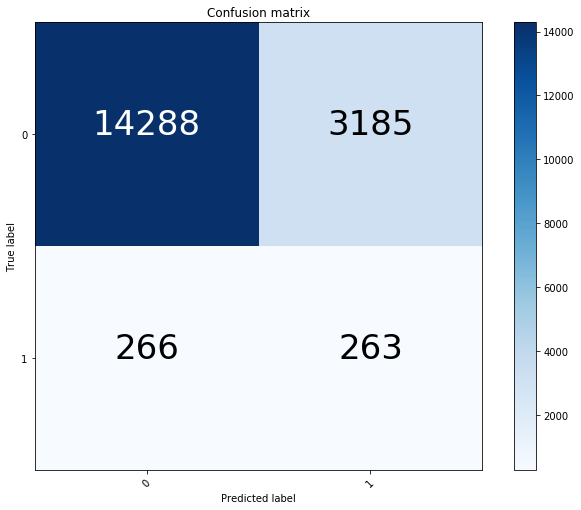

In [16]:
plot_confusion_matrix(test_golden["relation.1"], lstm_result["bin"], classes=[0,1])

In [63]:
precision_score(test_golden["relation.1"], lstm_result["bin"])

0.07627610208816706

In [17]:
pairs = test.drop_duplicates(subset=["label1", "label2"])

In [18]:
pairs.head()

,entity1ID,entity2ID,label1,label2,relation,snippet,relation.1
0,497,494,Ford_Motor_Company,Holden,NaN,95s to top the sheets ahead of Kiwi Fabian Cou...,False
2,188,244,Apple_Inc.,HBO,NaN,\nGamers who want to access HBO Now on the Xbo...,False
5,456,314,Google,Verizon_Communications,NaN,\nGoogle's business immediately took a hit : p...,False
6,522,178,Twitter,Beats_Electronics,NaN,"His endorsement list ain't bad either, includ...",False
7,426,424,AT&T,T-Mobile_US,NaN,"\nReplacement offers from AT&T, Verizon, Sprin...",False


In [19]:
pairs.shape

(769, 7)

In [20]:
pairs["relation.1"].value_counts()

False    727
True      42
Name: relation.1, dtype: int64

In [21]:
def check_pair_any(company1, company2):
    return lstm_result[ (lstm_result["company1"] == company1) & (lstm_result["company2"] == company2) ]["bin"].any()

In [22]:
def check_pair_all(company1, company2):
    return lstm_result[ (lstm_result["company1"] == company1) & (lstm_result["company2"] == company2) ]["bin"].all()

In [23]:
lstm_result["any"] = lstm_result.apply(lambda x: check_pair_any(x["company1"], x["company2"]), axis=1)

In [24]:
lstm_result["all"] = lstm_result.apply(lambda x: check_pair_all(x["company1"], x["company2"]), axis=1)

In [25]:
lstm_result["all"].value_counts()

False    17946
True        56
Name: all, dtype: int64

In [26]:
lstm_per_pair = lstm_result.drop_duplicates(subset=["company1", "company2"])
lstm_per_pair["any"].value_counts()

True     485
False    284
Name: any, dtype: int64

In [27]:
lstm_per_pair["all"].value_counts()

False    736
True      33
Name: all, dtype: int64

In [77]:
f1_score(pairs["relation.1"],lstm_per_pair["bin"])

0.29347826086956524

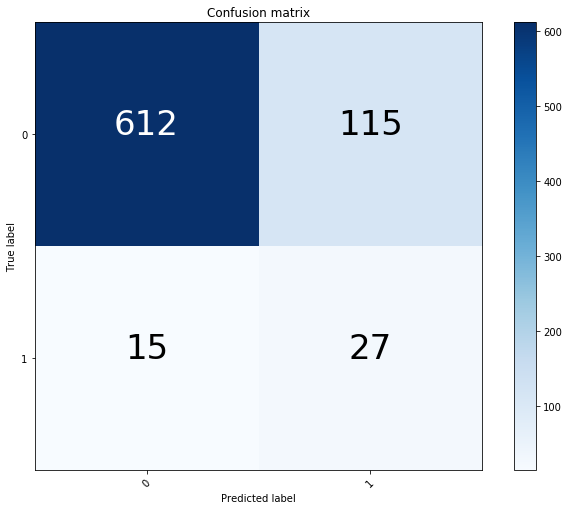

In [76]:
plot_confusion_matrix(pairs["relation.1"], lstm_per_pair["bin"], classes=[0,1])

In [31]:
vicky_test = pd.read_csv("onto-test/vicky-test.csv")

In [32]:
vicky_test.head()

,Unnamed: 0,company1,company2,snippet,prob,imp_sent_num
0,0,ALFA_(Mexico),Axtel,"[' assets of its energy unit newpek, but that ...",0.000216,0
1,1,ARIAD_Pharmaceuticals,Takeda_Pharmaceutical_Company,"[""japan's company2 a ready for fresh acquisiti...",0.000684,18
2,2,AT&T,Boeing,"[' \xa0\n""immigrants or their children founded...",0.000106,17
3,3,AT&T,Boost_Mobile,"["" they're on different carriers: company1 , ...",0.000002,6
4,4,AT&T,Bright_House_Networks,"[""o) purchase of time warner cable and compan...",0.001734,0


In [33]:
pairs_sorted = pairs.sort_values(by=["label1", "label2"])
pairs_sorted.head()

,entity1ID,entity2ID,label1,label2,relation,snippet,relation.1
4872,70,324,ALFA_(Mexico),Axtel,NaN,"assets of its energy unit Newpek, but that it...",True
791,351,269,ARIAD_Pharmaceuticals,Takeda_Pharmaceutical_Company,NaN,Japan'sTakeda_Pharmaceutical_Companya ready fo...,False
267,426,122,AT&T,Boeing,NaN,"\n""Immigrants or their children founded more...",False
3725,426,500,AT&T,Boost_Mobile,NaN,"They're on different carriers: AT&T, Verizon,...",False
1245,426,532,AT&T,Bright_House_Networks,NaN,O) purchase of Time Warner Cable and Bright_Ho...,False


In [34]:
 vicky_test["bin"]=vicky_test["prob"] > 0.5

In [35]:
f1_score(pairs_sorted["relation.1"], vicky_test["bin"])

0.25862068965517243

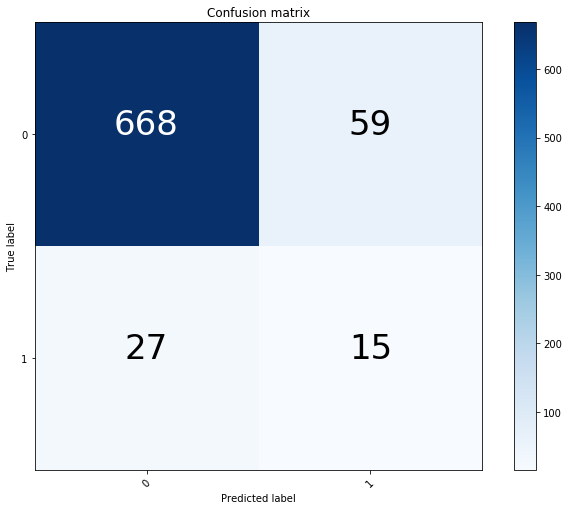

In [36]:
plot_confusion_matrix(pairs_sorted["relation.1"], vicky_test["bin"], classes=[0,1])

In [37]:
from sklearn.metrics import precision_score

In [38]:
precision_score(pairs_sorted["relation.1"], vicky_test["bin"])

0.20270270270270271

In [40]:
precision_score(pairs["relation.1"], lstm_per_pair["all"])

0.42424242424242425

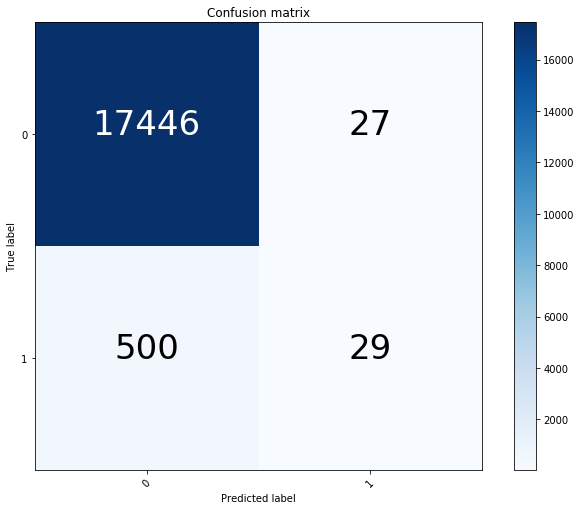

In [67]:
plot_confusion_matrix(test_golden["relation.1"], lstm_result["all"], classes=[0,1])

In [47]:
centroida = pd.read_csv("onto-test/final_csv_centroida.csv")
centroida.head()

,Unnamed: 0,company1,company2,is_parent,snippet
0,0,Ford_Motor_Company,Holden,False,95s to top the sheets ahead of Kiwi Fabian Cou...
1,1,Ford_Motor_Company,Holden,False,95s to top the sheets ahead of Kiwi Fabian Cou...
2,2,Apple_Inc.,HBO,False,\nGamers who want to access HBO Now on the Xbo...
3,3,Apple_Inc.,HBO,False,\nHBO first launched its standalone subscripti...
4,4,Apple_Inc.,HBO,False,\nHBO first launched its standalone subscripti...


In [52]:
test.head()

,entity1ID,entity2ID,label1,label2,relation,snippet,relation.1
0,497,494,Ford_Motor_Company,Holden,NaN,95s to top the sheets ahead of Kiwi Fabian Cou...,False
1,497,494,Ford_Motor_Company,Holden,NaN,95s to top the sheets ahead of Kiwi Fabian Cou...,False
2,188,244,Apple_Inc.,HBO,NaN,\nGamers who want to access HBO Now on the Xbo...,False
3,188,244,Apple_Inc.,HBO,NaN,\nHBO first launched its standalone subscripti...,False
4,188,244,Apple_Inc.,HBO,NaN,\nHBO first launched its standalone subscripti...,False


In [51]:
precision_score(test["relation.1"],centroida["is_parent"] )

0.11963882618510158

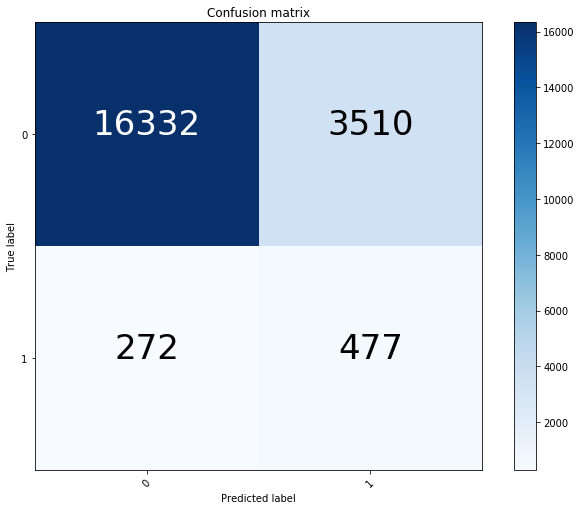

In [53]:
plot_confusion_matrix(testte["relation.1"], centroida["is_parent"], classes=[0,1])

In [60]:
centroida = centroida.drop_duplicates(subset=["company1", "company2", "snippet"])
centroida.shape

(18002, 5)

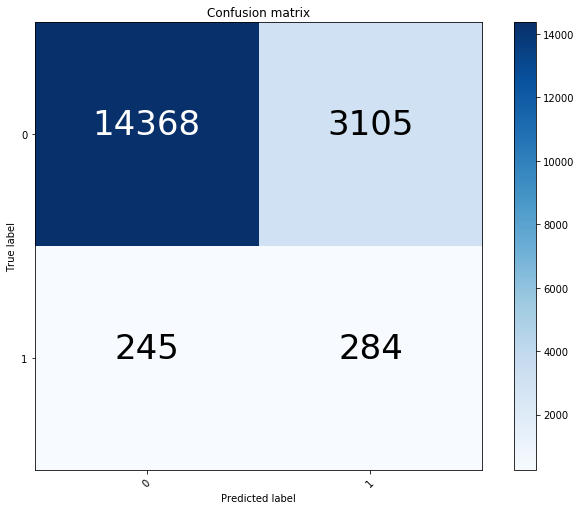

In [61]:
plot_confusion_matrix(test_golden["relation.1"], centroida["is_parent"], classes=[0,1])

In [62]:
precision_score(test_golden["relation.1"],centroida["is_parent"] )

0.08380053113012688

In [43]:
centroida = centroida.drop_duplicates(subset=["company1", "company2"])
centroida.shape

(769, 5)

In [44]:
precision_score(pairs["relation.1"], centroida["is_parent"])

0.17647058823529413

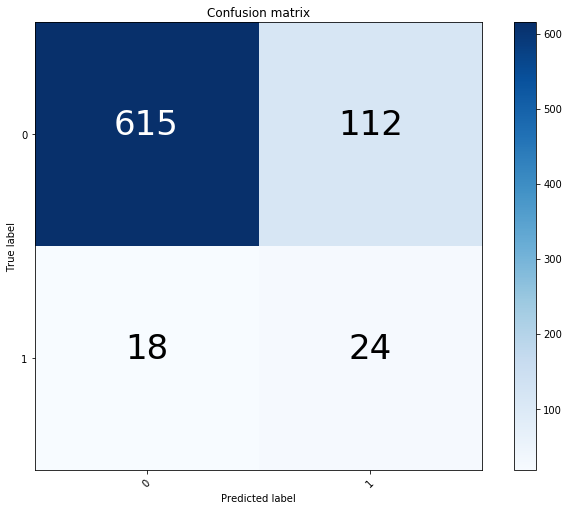

In [75]:
plot_confusion_matrix(pairs["relation.1"], centroida["is_parent"], classes=[0,1])